In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.isnull().sum() ##isnull == age, cabin, embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

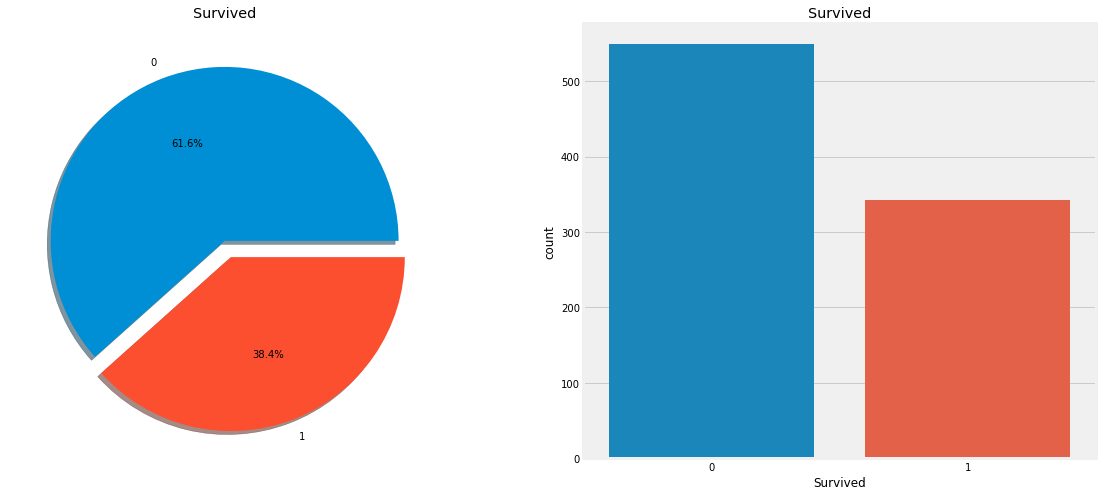

In [4]:
f, ax = plt.subplots(1,2, figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

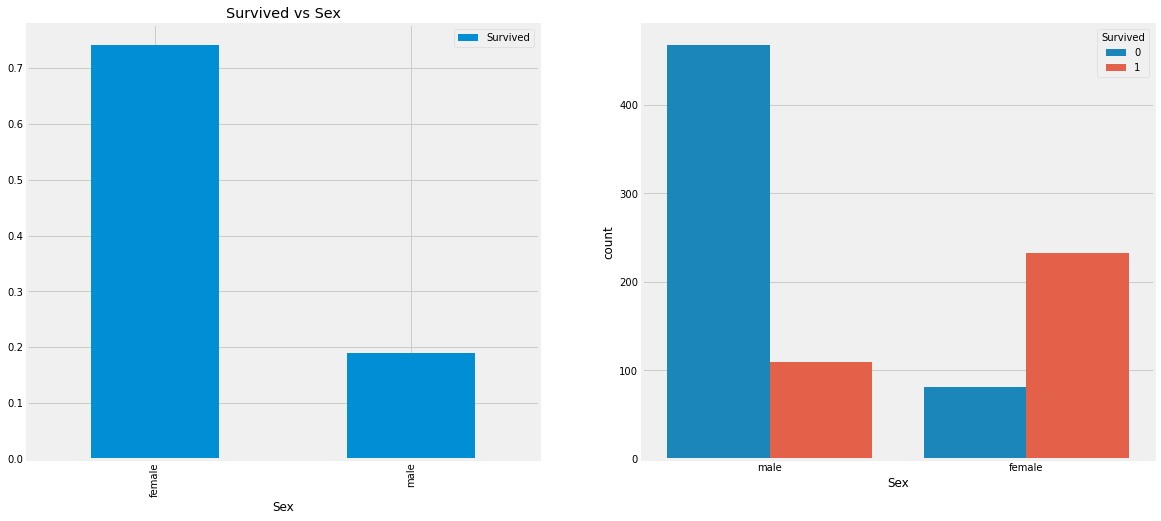

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
plt.show()

In [7]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<function matplotlib.pyplot.show(close=None, block=None)>

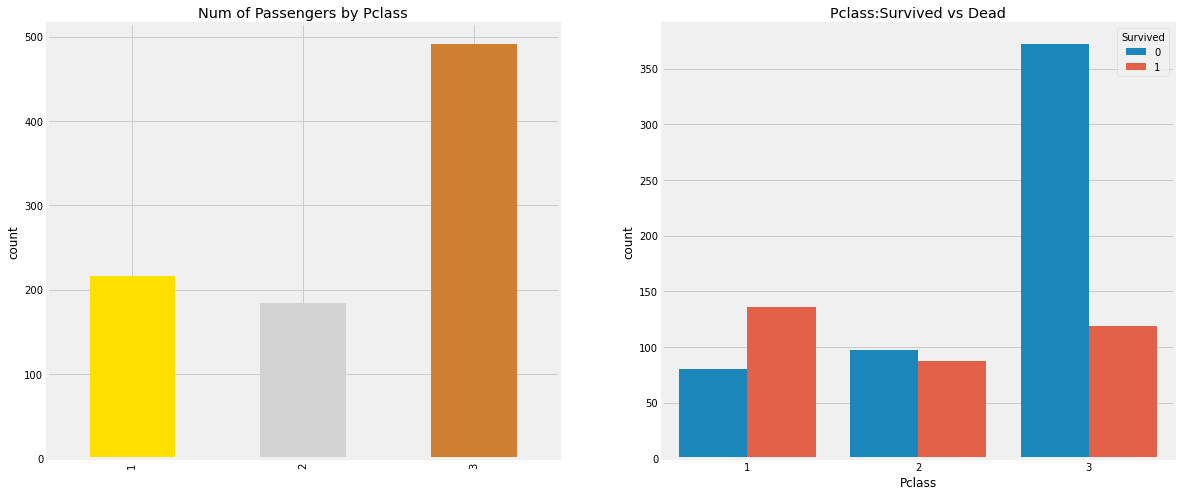

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Num of Passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show

In [9]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

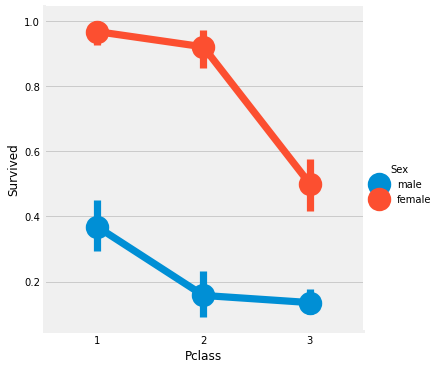

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data= data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

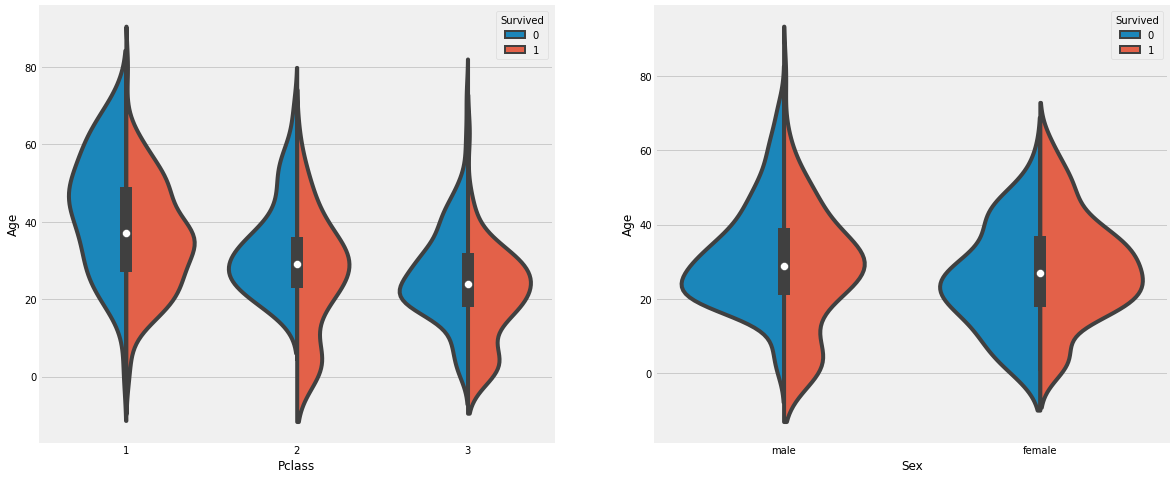

In [11]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=1, ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=1, ax=ax[1])

In [12]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [13]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [14]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [15]:
data['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [16]:
data['Age'].groupby(data['Initial']).mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data['Age'].isnull().sum()

0

<AxesSubplot:ylabel='Frequency'>

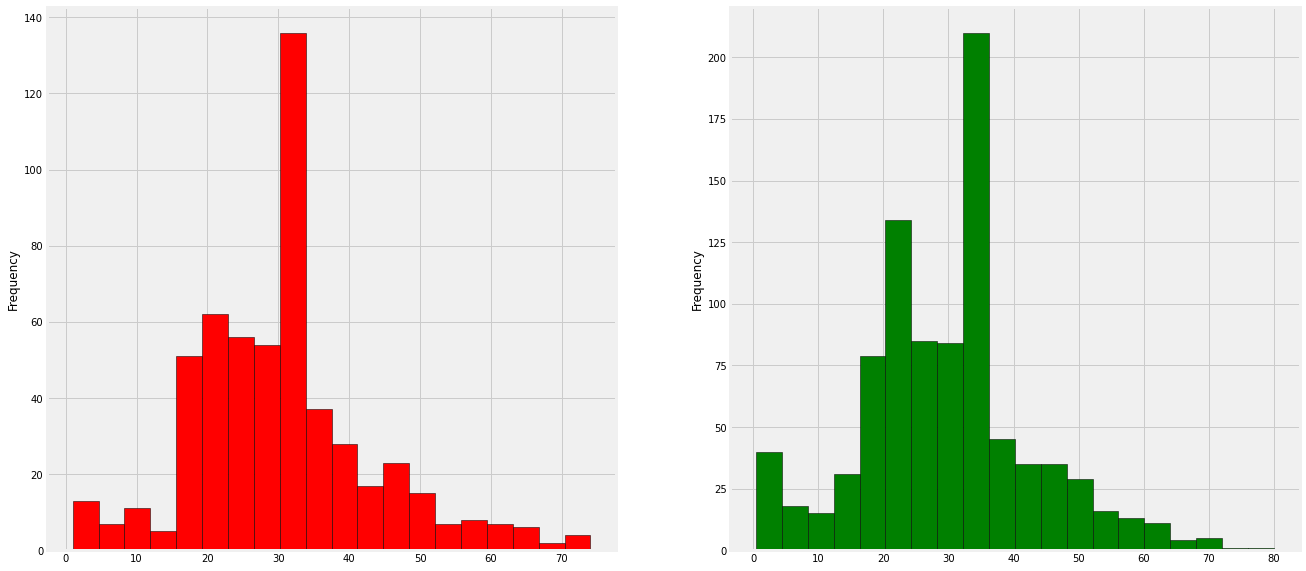

In [19]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
data['Age'].plot.hist(data['Survived']== 1, ax=ax[1], bins=20, edgecolor='black', color = 'green')

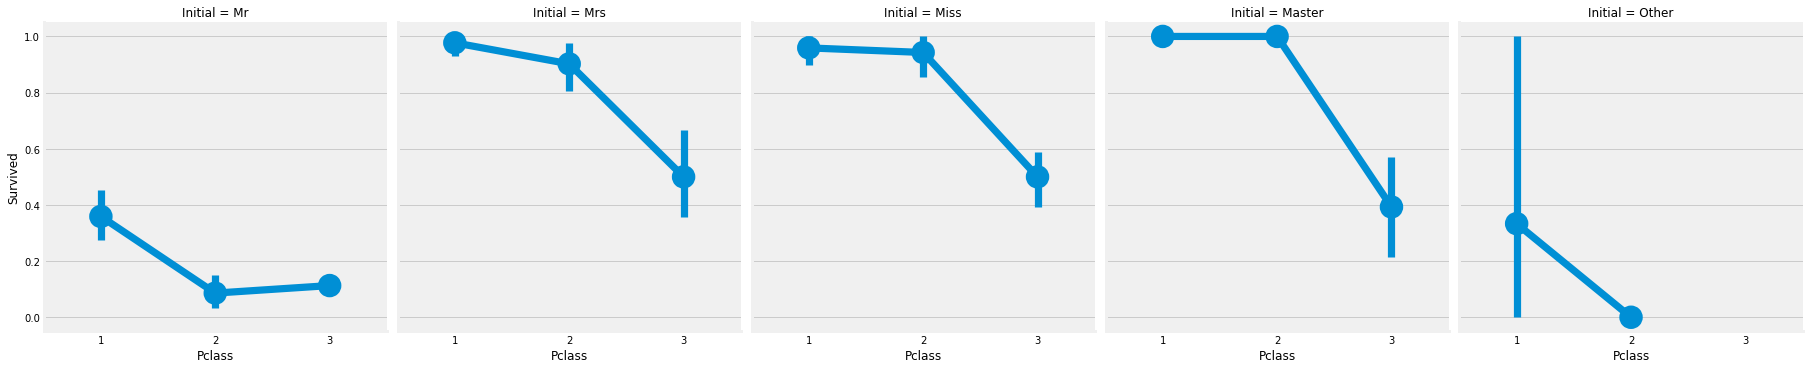

In [20]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

In [21]:
pd.crosstab([data['Embarked'], data['Pclass']],[data['Sex'],data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

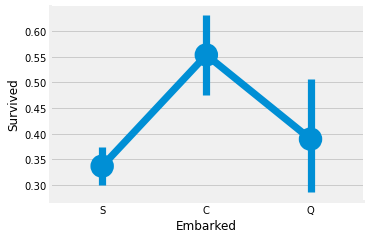

In [22]:
sns.factorplot('Embarked','Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

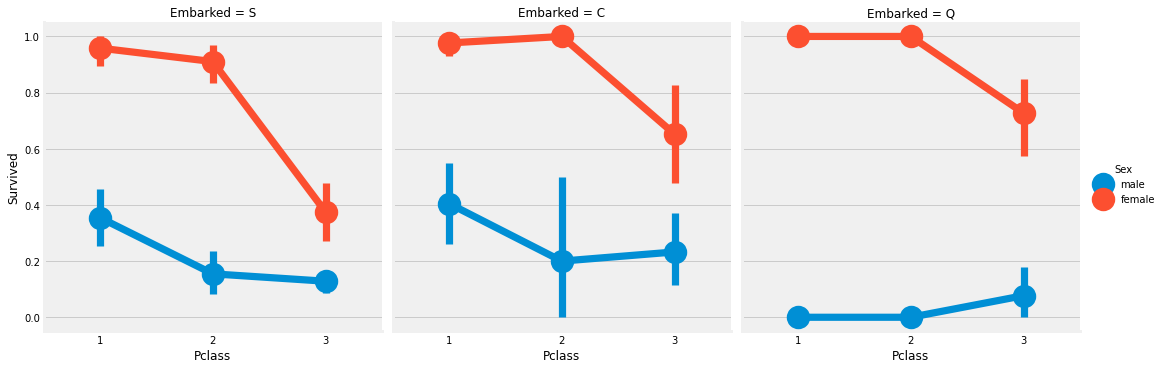

In [23]:
sns.factorplot('Pclass','Survived', hue = 'Sex', col='Embarked', data=data)

In [24]:
data['Embarked'].fillna('S', inplace=True)

In [25]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap= 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


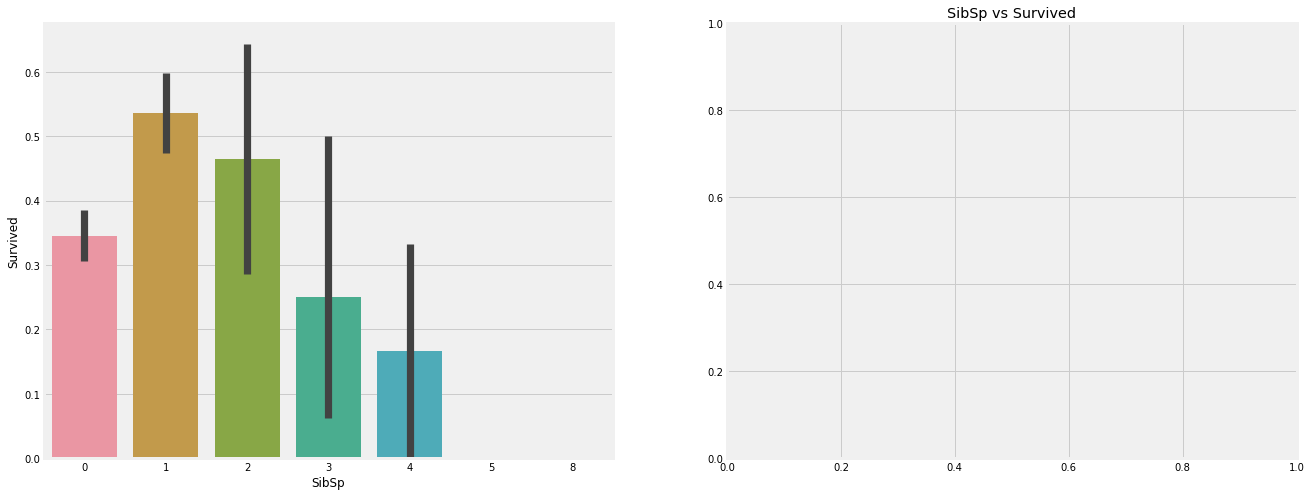

In [26]:
f, ax = plt.subplots(1,2, figsize = (20,8))
sns.barplot('SibSp', 'Survived',data=data, ax = ax[0])
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [27]:
pd.crosstab(data['SibSp'], data['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


<AxesSubplot:xlabel='Fare', ylabel='Density'>

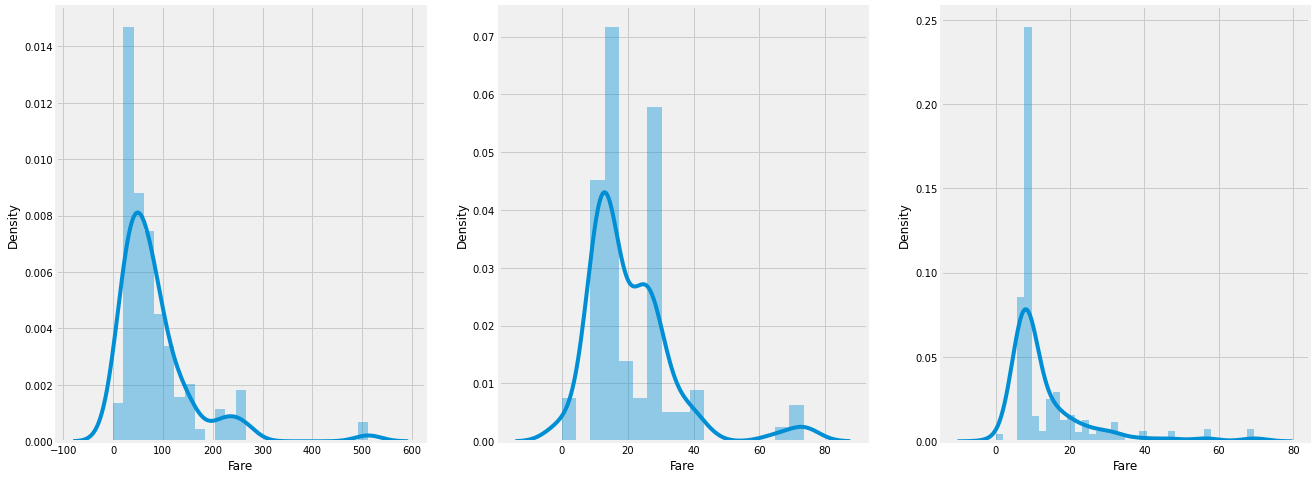

In [28]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])

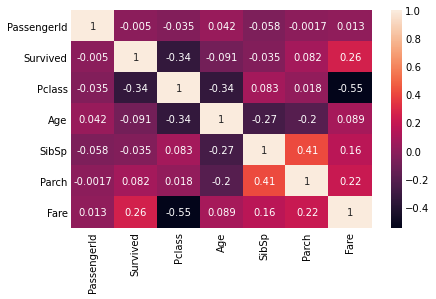

In [29]:
sns.heatmap(data.corr(), annot=True)
fig = plt.gcf()

In [30]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [31]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size']==0, 'Alone'] = 1

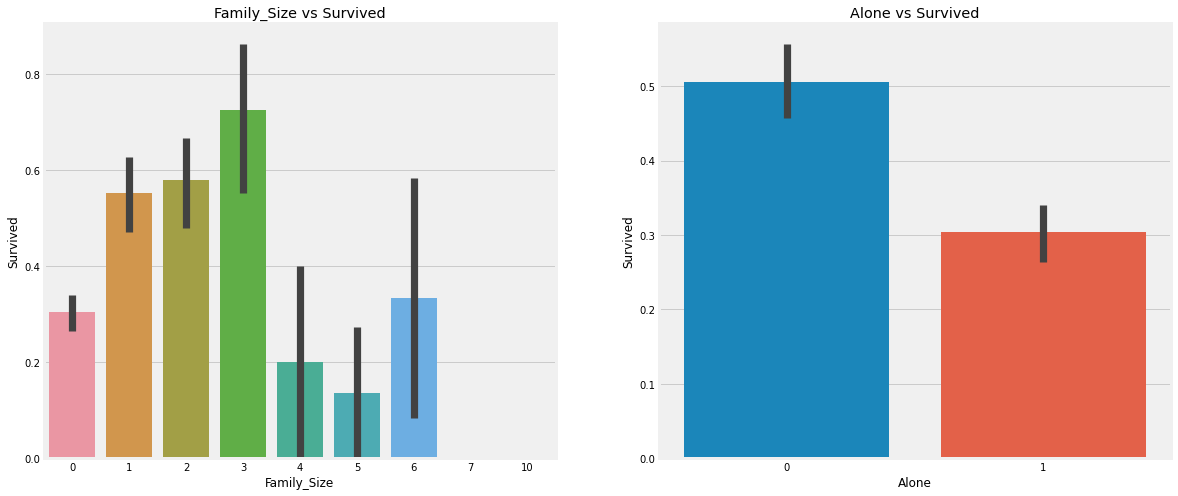

In [32]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.barplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

In [33]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap= 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


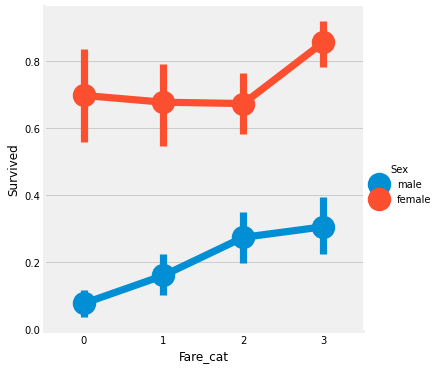

In [34]:
data['Fare_cat'] = 0
data.loc[data['Fare']< 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<14.45), 'Fare_cat'] =1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3


sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')

In [35]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0,1,2,3,4], inplace=True)

In [36]:
data.drop(['Name', 'Age', 'Ticket', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

<AxesSubplot:>

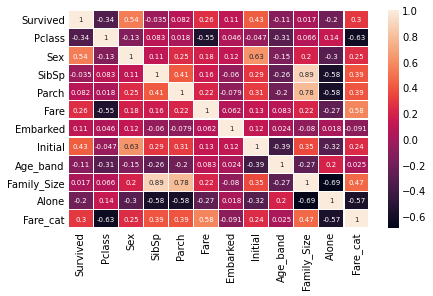

In [37]:
sns.heatmap(data.corr(), annot=True, linewidths=0.2, annot_kws = {'size':7})

In [38]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [39]:
train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify=data['Survived'])

In [40]:
train_x = train[train.columns[1:]]
train_y = train[train.columns[:1]]

test_x = test[test.columns[1:]]
test_y = test[test.columns[:1]]

x=data[data.columns[1:]]
y=data[data.columns[:1]]

In [41]:
model= svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x, train_y)
prediction1 = model.predict(test_x)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_y))

Accuracy for rbf SVM is  0.8097014925373134
